https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kshape.html#sphx-glr-auto-examples-clustering-plot-kshape-py

In [1]:

# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [2]:

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

In [4]:
y_train  # X->y labels

array([1, 2, 4, 3, 1, 4, 4, 1, 1, 4, 4, 4, 4, 3, 4, 1, 3, 2, 4, 4, 4, 4,
       3, 2, 1, 2, 4, 4, 2, 4, 1, 1, 4, 4, 2, 1, 1, 2, 1, 1, 3, 3, 3, 3,
       3, 1, 4, 4, 4, 2, 4, 3, 2, 1, 4, 2, 2, 2, 2, 1, 3, 2, 4, 3, 3, 2,
       2, 1, 4, 4, 2, 3, 2, 1, 3, 4, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 4, 1,
       2, 1, 4, 4, 4, 1, 3, 1, 2, 4, 1, 2])

In [5]:
X_train[0]

array([[ 0.54407 ],
       [ 0.65786 ],
       [ 0.61124 ],
       [ 0.54541 ],
       [ 0.53216 ],
       [ 0.59301 ],
       [ 0.59528 ],
       [ 0.53828 ],
       [ 0.56343 ],
       [ 0.59596 ],
       [ 0.63291 ],
       [ 0.58465 ],
       [ 0.62319 ],
       [ 0.60595 ],
       [ 0.59037 ],
       [ 0.62702 ],
       [ 0.61349 ],
       [ 0.62305 ],
       [ 0.54602 ],
       [ 0.64114 ],
       [ 0.54939 ],
       [ 0.6107  ],
       [ 0.57797 ],
       [ 0.63567 ],
       [ 0.57422 ],
       [ 0.60636 ],
       [ 0.63805 ],
       [ 0.6406  ],
       [ 0.60581 ],
       [ 0.65487 ],
       [ 0.62934 ],
       [ 0.67355 ],
       [ 0.64083 ],
       [ 0.67107 ],
       [ 0.59539 ],
       [ 0.58943 ],
       [ 0.61587 ],
       [ 0.66704 ],
       [ 0.6038  ],
       [ 0.63386 ],
       [ 0.64719 ],
       [ 0.64483 ],
       [ 0.64369 ],
       [ 0.6235  ],
       [ 0.56237 ],
       [ 0.61063 ],
       [ 0.60773 ],
       [ 0.64241 ],
       [ 0.57792 ],
       [ 0.68621 ],


In [6]:
X_train.shape  # Whole training set

(100, 275, 1)

In [7]:
X_train[0].shape  # Each series

(275, 1)

In [8]:
numpy.random.shuffle(X_train)
# For this method to operate properly, prior scaling is required
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]


In [9]:

# kShape clustering
ks = KShape(n_clusters=3, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)


0.001 --> 0.001 --> 0.001 --> 


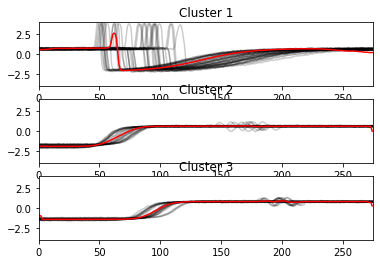

In [10]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))